In [5]:
pip install pandas requests scikit-learn


In [6]:
# Step 1: Import the necessary libraries and download the dataset
import pandas as pd
import requests
from io import StringIO

# Download the dataset
url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
response = requests.get(url)

# Convert the CSV content to a pandas DataFrame
data = pd.read_csv(StringIO(response.text))

# Print a summary of the dataset
print(data.info())
print(data.describe())

# Step 2: Prepare X, Y using Train-Test Split
from sklearn.model_selection import train_test_split

# Define features and target
X = data.drop('medv', axis=1)  # Features (excluding target variable)
y = data['medv']  # Target variable (median value of homes)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build Model using Lasso
from sklearn.linear_model import Lasso

# Create a Lasso regression model
lasso_model = Lasso(alpha=0.1)  # Adjust alpha as necessary
lasso_model.fit(X_train, y_train)

# Step 4: Evaluate Model by R² Score and MSE
from sklearn.metrics import r2_score, mean_squared_error

# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Step 5: Predict Y_test Value
print("Predicted Y_test values:", y_pred[:5])  # Print the first 5 predicted values
print("Actual Y_test values:", y_test.values[:5])  # Print the first 5 actual values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695   

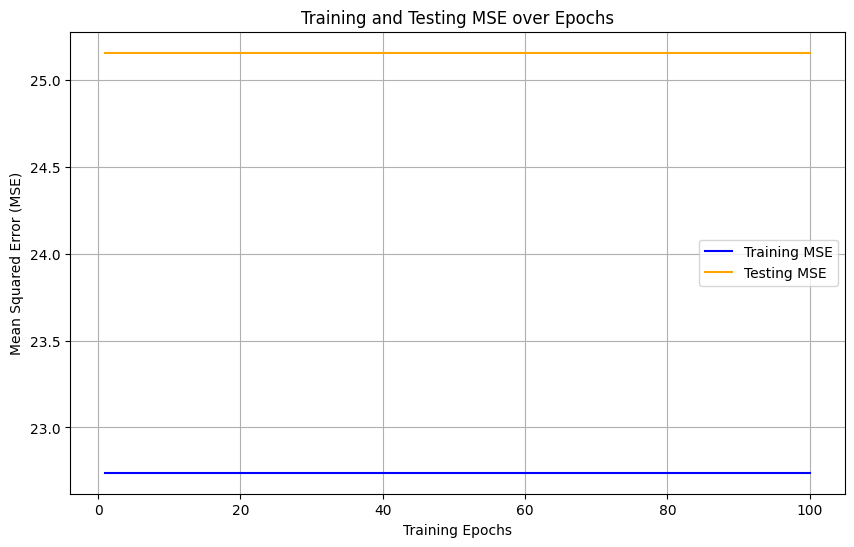

Final R² Score: 0.6569712802223936
Final Mean Squared Error: 25.155593753934173
Predicted Y_test values: [28.4034798  33.98676148 13.46016592 24.55747643 19.66754423]
Actual Y_test values: [23.6 32.4 13.6 22.8 16.1]


In [7]:
# Step 1: Import the necessary libraries and download the dataset
import pandas as pd
import requests
from io import StringIO

# Download the dataset
url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
response = requests.get(url)

# Convert the CSV content to a pandas DataFrame
data = pd.read_csv(StringIO(response.text))

# Print a summary of the dataset
print(data.info())
print(data.describe())

# Step 2: Prepare X, Y using Train-Test Split
from sklearn.model_selection import train_test_split

# Define features and target
X = data.drop('medv', axis=1)  # Features (excluding target variable)
y = data['medv']  # Target variable (median value of homes)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build Model using Lasso
from sklearn.linear_model import Lasso

# Create a Lasso regression model
lasso_model = Lasso(alpha=0.1)  # Adjust alpha as necessary

# Step 4: Evaluate Model by R² Score and MSE with Convergence Plot
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to store MSE values for each epoch
train_mse = []
test_mse = []
epochs = 100  # Number of training epochs

# Training loop
for epoch in range(epochs):
    lasso_model.fit(X_train, y_train)  # Fit the model to the training data
    y_train_pred = lasso_model.predict(X_train)
    y_test_pred = lasso_model.predict(X_test)

    # Calculate and store MSE
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))

# Plotting the convergence
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_mse, label='Training MSE', color='blue')
plt.plot(range(1, epochs + 1), test_mse, label='Testing MSE', color='orange')
plt.title('Training and Testing MSE over Epochs')
plt.xlabel('Training Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid()
plt.show()

# Calculate final R² score and MSE
final_r2 = r2_score(y_test, y_test_pred)
final_mse = mean_squared_error(y_test, y_test_pred)
print("Final R² Score:", final_r2)
print("Final Mean Squared Error:", final_mse)

# Step 5: Predict Y_test Value
print("Predicted Y_test values:", y_test_pred[:5])  # Print the first 5 predicted values
print("Actual Y_test values:", y_test.values[:5])  # Print the first 5 actual values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695   

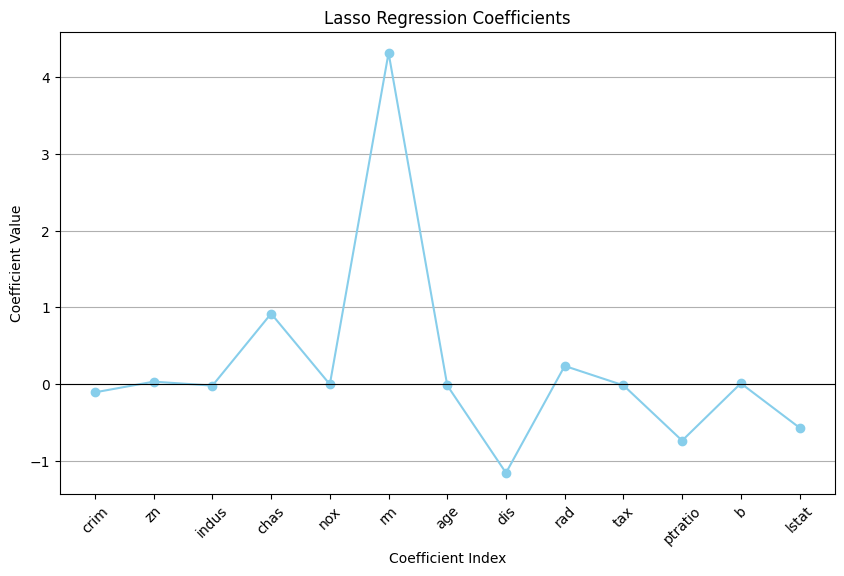

Final R² Score: 0.6569712802223936
Final Mean Squared Error: 25.155593753934173
Predicted Y_test values: [28.4034798  33.98676148 13.46016592 24.55747643 19.66754423]
Actual Y_test values: [23.6 32.4 13.6 22.8 16.1]


In [8]:
# mark code1

# Step 1: Import the necessary libraries and download the dataset
import pandas as pd
import requests
from io import StringIO

# Download the dataset
url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
response = requests.get(url)

# Convert the CSV content to a pandas DataFrame
data = pd.read_csv(StringIO(response.text))

# Print a summary of the dataset
print(data.info())
print(data.describe())

# Step 2: Prepare X, Y using Train-Test Split
from sklearn.model_selection import train_test_split

# Define features and target
X = data.drop('medv', axis=1)  # Features (excluding target variable)
y = data['medv']  # Target variable (median value of homes)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build Model using Lasso
from sklearn.linear_model import Lasso

# Create a Lasso regression model
lasso_model = Lasso(alpha=0.1)  # Adjust alpha as necessary

# Step 4: Evaluate Model by Coefficient Convergence Plot
import numpy as np
import matplotlib.pyplot as plt

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Extract coefficients and their indices
coefficients = lasso_model.coef_
coef_indices = np.arange(len(coefficients))

# Plotting the coefficients
plt.figure(figsize=(10, 6))
plt.plot(coef_indices, coefficients, marker='o', linestyle='-', color='skyblue')
plt.title('Lasso Regression Coefficients')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.xticks(coef_indices, X.columns, rotation=45)
plt.grid(axis='y')
plt.axhline(0, color='black', linewidth=0.8)  # Adding a horizontal line at y=0 for better visualization
plt.show()

# Calculate final R² score and MSE
y_pred = lasso_model.predict(X_test)
final_r2 = r2_score(y_test, y_pred)
final_mse = mean_squared_error(y_test, y_pred)
print("Final R² Score:", final_r2)
print("Final Mean Squared Error:", final_mse)

# Step 5: Predict Y_test Value
print("Predicted Y_test values:", y_pred[:5])  # Print the first 5 predicted values
print("Actual Y_test values:", y_test.values[:5])  # Print the first 5 actual values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695   

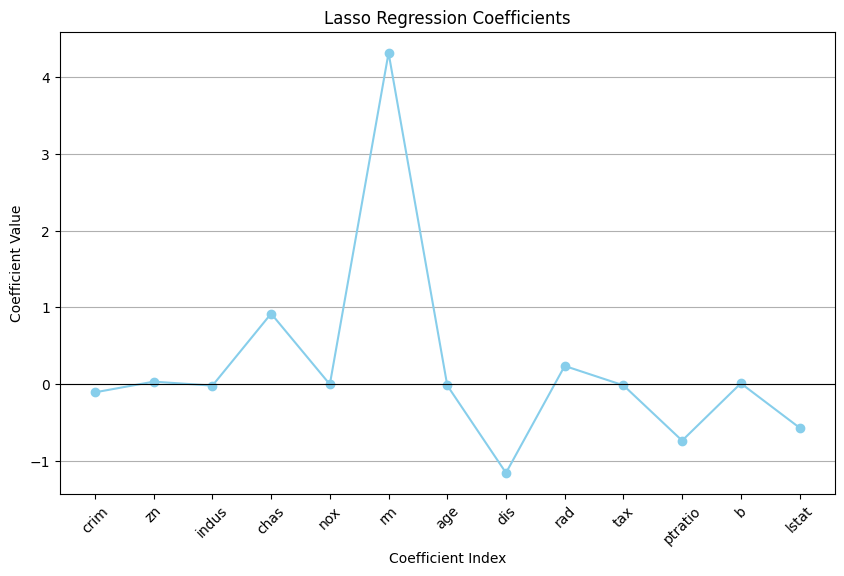

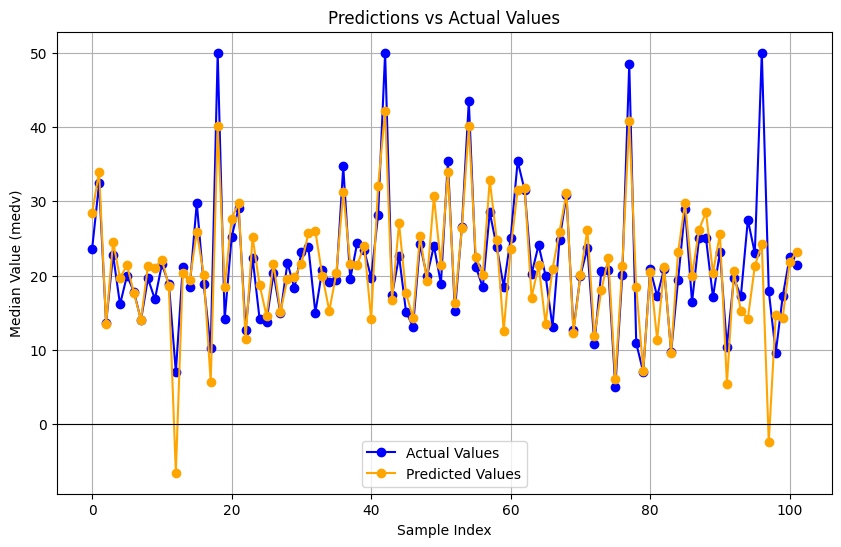

Final R² Score: 0.6569712802223936
Final Mean Squared Error: 25.155593753934173
Predicted Y_test values: [28.4034798  33.98676148 13.46016592 24.55747643 19.66754423]
Actual Y_test values: [23.6 32.4 13.6 22.8 16.1]


In [9]:
# Step 1: Import the necessary libraries and download the dataset
import pandas as pd
import requests
from io import StringIO

# Download the dataset
url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
response = requests.get(url)

# Convert the CSV content to a pandas DataFrame
data = pd.read_csv(StringIO(response.text))

# Print a summary of the dataset
print(data.info())
print(data.describe())

# Step 2: Prepare X, Y using Train-Test Split
from sklearn.model_selection import train_test_split

# Define features and target
X = data.drop('medv', axis=1)  # Features (excluding target variable)
y = data['medv']  # Target variable (median value of homes)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build Model using Lasso
from sklearn.linear_model import Lasso

# Create a Lasso regression model
lasso_model = Lasso(alpha=0.1)  # Adjust alpha as necessary

# Step 4: Evaluate Model by Coefficient Convergence Plot and Predictions vs Actuals
import numpy as np
import matplotlib.pyplot as plt

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Extract coefficients and their indices
coefficients = lasso_model.coef_
coef_indices = np.arange(len(coefficients))

# Plotting the coefficients
plt.figure(figsize=(10, 6))
plt.plot(coef_indices, coefficients, marker='o', linestyle='-', color='skyblue')
plt.title('Lasso Regression Coefficients')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.xticks(coef_indices, X.columns, rotation=45)
plt.grid(axis='y')
plt.axhline(0, color='black', linewidth=0.8)  # Adding a horizontal line at y=0 for better visualization
plt.show()

# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Plotting Predictions vs Actuals
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, marker='o', linestyle='-', color='blue', label='Actual Values')
plt.plot(y_pred, marker='o', linestyle='-', color='orange', label='Predicted Values')
plt.title('Predictions vs Actual Values')
plt.xlabel('Sample Index')
plt.ylabel('Median Value (medv)')
plt.legend()
plt.grid()
plt.axhline(0, color='black', linewidth=0.8)  # Adding a horizontal line at y=0 for better visualization
plt.show()

# Calculate final R² score and MSE
final_r2 = r2_score(y_test, y_pred)
final_mse = mean_squared_error(y_test, y_pred)
print("Final R² Score:", final_r2)
print("Final Mean Squared Error:", final_mse)

# Step 5: Predict Y_test Value
print("Predicted Y_test values:", y_pred[:5])  # Print the first 5 predicted values
print("Actual Y_test values:", y_test.values[:5])  # Print the first 5 actual values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695   

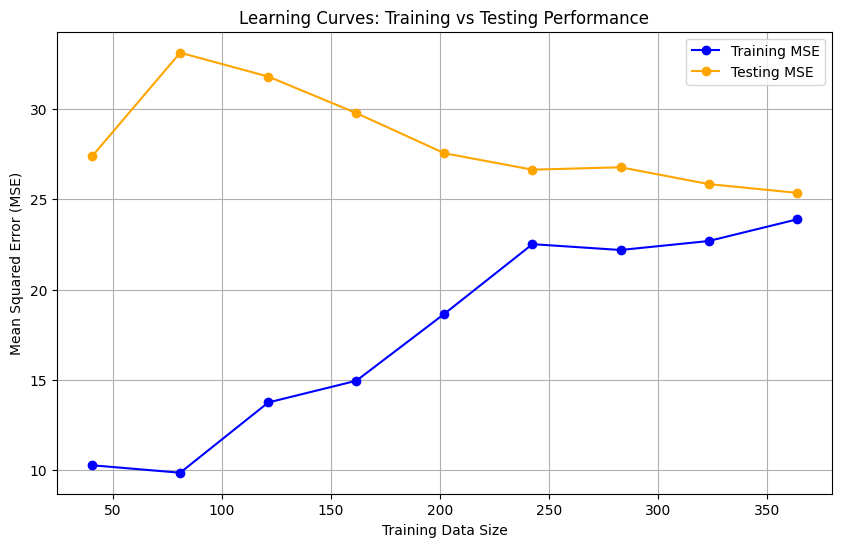

Final R² Score: 0.6569712802223936
Final Mean Squared Error: 25.155593753934173
Predicted Y_test values: [28.4034798  33.98676148 13.46016592 24.55747643 19.66754423]
Actual Y_test values: [23.6 32.4 13.6 22.8 16.1]


In [11]:
# Step 1: Import the necessary libraries and download the dataset
import pandas as pd
import requests
from io import StringIO

# Download the dataset
url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
response = requests.get(url)

# Convert the CSV content to a pandas DataFrame
data = pd.read_csv(StringIO(response.text))

# Print a summary of the dataset
print(data.info())
print(data.describe())

# Step 2: Prepare X, Y using Train-Test Split
from sklearn.model_selection import train_test_split

# Define features and target
X = data.drop('medv', axis=1)  # Features (excluding target variable)
y = data['medv']  # Target variable (median value of homes)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build Model using Lasso
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Create a Lasso regression model
lasso_model = Lasso(alpha=0.1)  # Adjust alpha as necessary

# Step 4: Evaluate Training and Testing Performance with Learning Curves
import numpy as np
import matplotlib.pyplot as plt

train_sizes = np.linspace(0.1, 0.9, 9)  # Training sizes between 10% and 90% of the training data
train_errors = []
test_errors = []

# Loop over different training sizes
for train_size in train_sizes:
    # Select a portion of the training data
    X_train_partial, _, y_train_partial, _ = train_test_split(X_train, y_train, train_size=train_size, random_state=42)

    # Train the model on the partial training data
    lasso_model.fit(X_train_partial, y_train_partial)

    # Predict and calculate MSE on the training data
    y_train_pred = lasso_model.predict(X_train_partial)
    train_mse = mean_squared_error(y_train_partial, y_train_pred)

    # Predict and calculate MSE on the test data
    y_test_pred = lasso_model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Store the errors
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Plotting the learning curves (Training vs Testing performance)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes * len(X_train), train_errors, label="Training MSE", marker='o', linestyle='-', color='blue')
plt.plot(train_sizes * len(X_train), test_errors, label="Testing MSE", marker='o', linestyle='-', color='orange')
plt.title('Learning Curves: Training vs Testing Performance')
plt.xlabel('Training Data Size')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate final R² score and MSE for the complete dataset
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
final_r2 = r2_score(y_test, y_pred)
final_mse = mean_squared_error(y_test, y_pred)
print("Final R² Score:", final_r2)
print("Final Mean Squared Error:", final_mse)

# Step 5: Predict Y_test Value
print("Predicted Y_test values:", y_pred[:5])  # Print the first 5 predicted values
print("Actual Y_test values:", y_test.values[:5])  # Print the first 5 actual values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695   

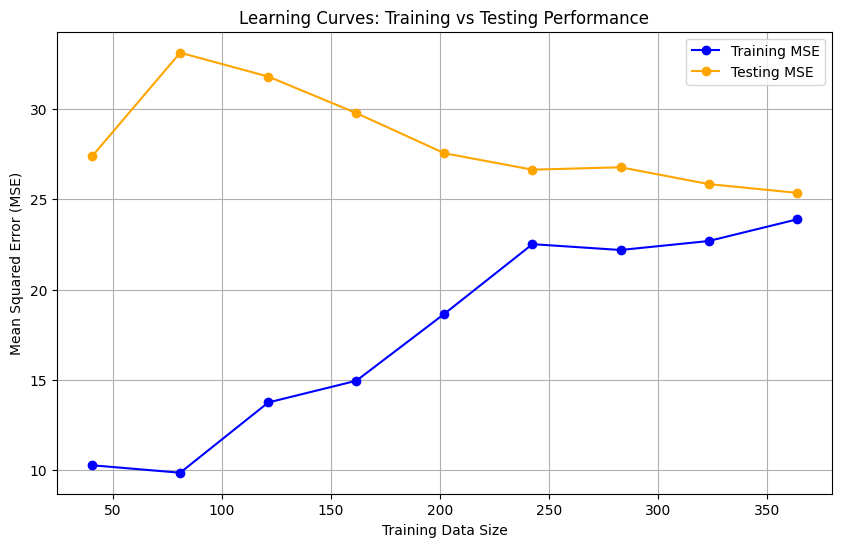

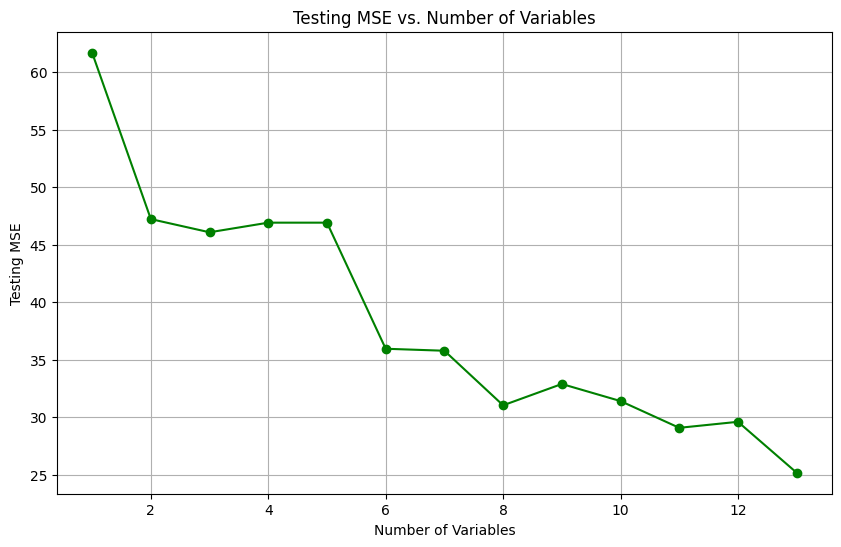

Final R² Score: 0.6569712802223936
Final Mean Squared Error: 25.155593753934173
Predicted Y_test values: [28.4034798  33.98676148 13.46016592 24.55747643 19.66754423]
Actual Y_test values: [23.6 32.4 13.6 22.8 16.1]


In [14]:
# Step 1: Import the necessary libraries and download the dataset
import pandas as pd
import requests
from io import StringIO

# Download the dataset
url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
response = requests.get(url)

# Convert the CSV content to a pandas DataFrame
data = pd.read_csv(StringIO(response.text))

# Print a summary of the dataset
print(data.info())
print(data.describe())

# Step 2: Prepare X, Y using Train-Test Split
from sklearn.model_selection import train_test_split

# Define features and target
X = data.drop('medv', axis=1)  # Features (excluding target variable)
y = data['medv']  # Target variable (median value of homes)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build Model using Lasso
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Create a Lasso regression model
lasso_model = Lasso(alpha=0.1)  # Adjust alpha as necessary

# Step 4: Evaluate Training and Testing Performance with Learning Curves and Testing MSE vs. Number of Variables
import numpy as np
import matplotlib.pyplot as plt

# ------------------- Learning Curves: Training MSE vs Testing MSE -------------------
train_sizes = np.linspace(0.1, 0.9, 9)  # Training sizes between 10% and 90% of the training data
train_errors = []
test_errors = []

# Loop over different training sizes for Learning Curves
for train_size in train_sizes:
    X_train_partial, _, y_train_partial, _ = train_test_split(X_train, y_train, train_size=train_size, random_state=42)

    # Train the model on the partial training data
    lasso_model.fit(X_train_partial, y_train_partial)

    # Predict and calculate MSE on the training and test data
    y_train_pred = lasso_model.predict(X_train_partial)
    y_test_pred = lasso_model.predict(X_test)

    train_mse = mean_squared_error(y_train_partial, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Store the errors
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Plot Learning Curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes * len(X_train), train_errors, label="Training MSE", marker='o', linestyle='-', color='blue')
plt.plot(train_sizes * len(X_train), test_errors, label="Testing MSE", marker='o', linestyle='-', color='orange')
plt.title('Learning Curves: Training vs Testing Performance')
plt.xlabel('Training Data Size')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# ------------------- Testing MSE vs. Number of Variables -------------------
test_errors_vars = []

# Incrementally add features (variables)
for num_vars in range(1, X_train.shape[1] + 1):
    # Select the first num_vars columns of features
    X_train_partial = X_train.iloc[:, :num_vars]
    X_test_partial = X_test.iloc[:, :num_vars]

    # Train the model on the selected variables
    lasso_model.fit(X_train_partial, y_train)

    # Predict on the test data and calculate MSE
    y_test_pred = lasso_model.predict(X_test_partial)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Store the MSE for this number of variables
    test_errors_vars.append(test_mse)

# Plot Testing MSE vs. Number of Variables
plt.figure(figsize=(10, 6))
plt.plot(range(1, X_train.shape[1] + 1), test_errors_vars, marker='o', linestyle='-', color='green')
plt.title('Testing MSE vs. Number of Variables')
plt.xlabel('Number of Variables')
plt.ylabel('Testing MSE')
plt.grid(True)
plt.show()

# ------------------- Final Model Evaluation -------------------
# Calculate final R² score and MSE for the complete dataset
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
final_r2 = r2_score(y_test, y_pred)
final_mse = mean_squared_error(y_test, y_pred)

print("Final R² Score:", final_r2)
print("Final Mean Squared Error:", final_mse)

# Step 5: Predict Y_test Value
print("Predicted Y_test values:", y_pred[:5])  # Print the first 5 predicted values
print("Actual Y_test values:", y_test.values[:5])  # Print the first 5 actual values
